In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from scipy.stats import zscore
import pickle

In [155]:
sns.set_style('darkgrid')
pd.set_option.max_rows = 100
pd.set_option.max_columns = 23


In [191]:
df = pd.read_csv('weatherAUS.csv')

In [157]:
copy = df.copy()

In [158]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.shape

(145460, 23)

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [192]:
df_num = [feature for feature in df.columns if df[feature].dtypes != 'O']
df_discrete=[feature for feature in df_num if len(df[feature].unique())<25]
df_cont = [feature for feature in df_num if feature not in df_discrete]
df_cat = [feature for feature in df.columns if feature not in df_num]
print("Numerical Features Count {}".format(len(df_num)))
print("Discrete feature Count {}".format(len(df_discrete)))
print("Continuous feature Count {}".format(len(df_cont)))
print("Categorical feature Count {}".format(len(df_cat)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [66]:
df_num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [67]:
df_discrete

['Cloud9am', 'Cloud3pm']

In [68]:
df_cont

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [69]:
df_cat

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [70]:
df.isnull().sum() / len(df) * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

MinTemp 0.021188284011150468
MaxTemp 0.22083934813407782
Rainfall 9.83622525039533
Evaporation 3.7612860111420643
Sunshine -0.4964800381328167
WindGustSpeed 0.8748788780303394
WindSpeed9am 0.7776295122810298
WindSpeed3pm 0.6282154194116664
Humidity9am -0.48396899459793047
Humidity3pm 0.03361436764166918
Pressure9am -0.09552363669451734
Pressure3pm -0.04562140480119886
Cloud9am -0.229081832248417
Cloud3pm -0.22638434607149094
Temp9am 0.08853999659506906
Temp3pm 0.2379603639909972


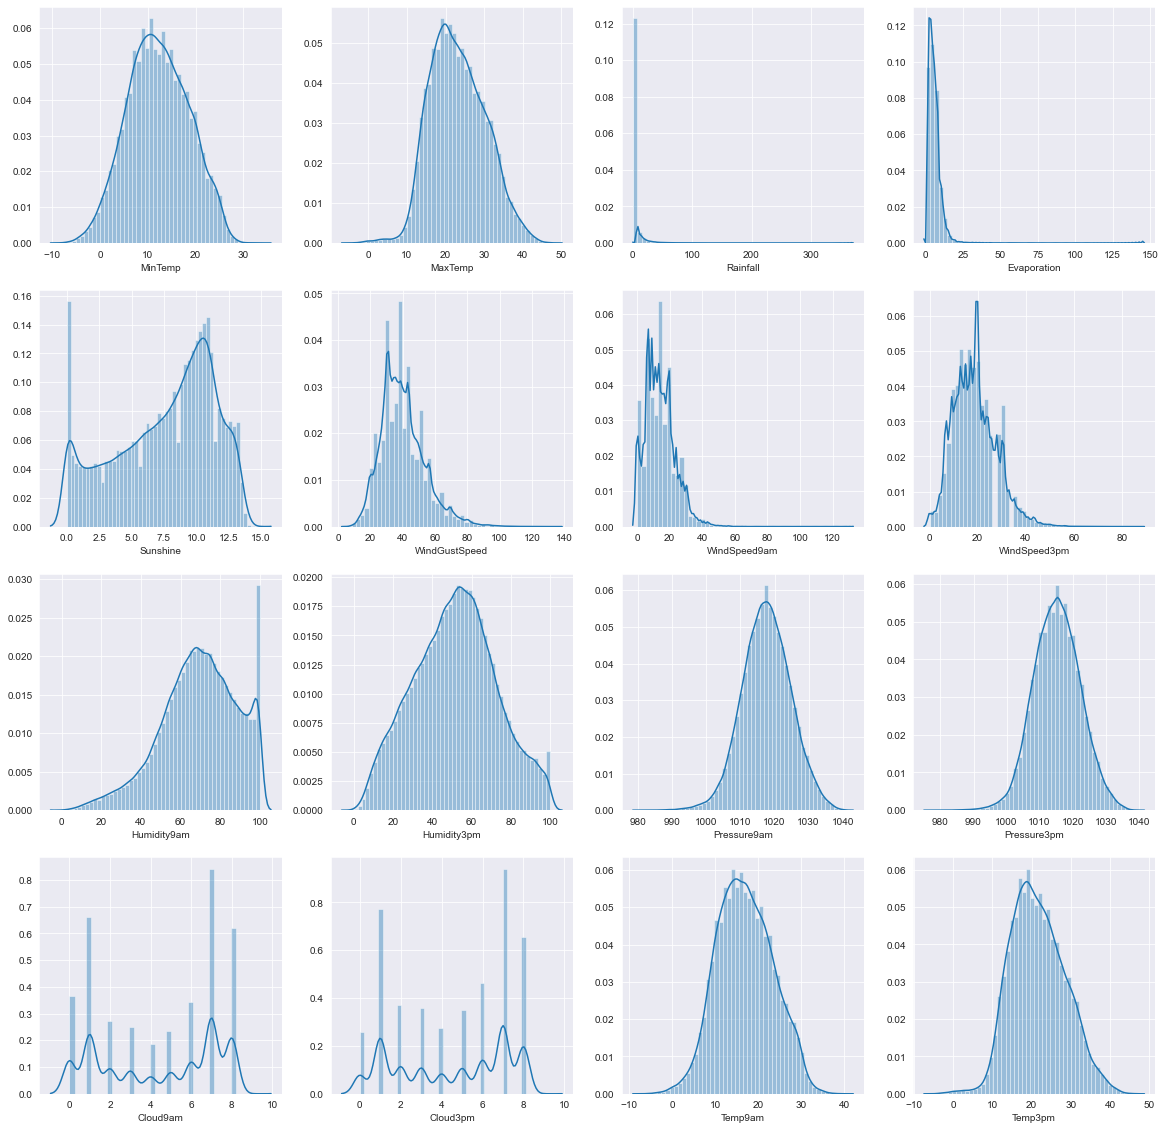

<Figure size 432x288 with 0 Axes>

In [11]:
i = 1
plt.figure(figsize=(20,20))
for col in df_num:
    if df[col].isnull().sum() > 0:
        print(col, df[col].skew())
        plt.subplot(4,4,i)
        sns.distplot(df[col])
        i = i+1
plt.show()
plt.tight_layout()
    

In [193]:
## random imputation for features with more than 20% null values

def randomimpu(col):
    random = df[col].dropna().sample(df[col].isnull().sum())
    random.index = df[df[col].isnull()][col].index
    df.loc[df[col].isnull(),col] = random

In [194]:
randomimpu('Evaporation')
randomimpu('Sunshine')
randomimpu('Cloud9am')
randomimpu('Cloud3pm')



In [14]:
df.isnull().sum() / len(df) * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation       0.000000
Sunshine          0.000000
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [195]:
for col in df_num:
    if df[col].isnull().sum() > 0:
        if df[col].skew() > abs(0.5):
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mean())


In [163]:
df[df_cat].isnull().sum() / len(df) * 100

Date            0.000000
Location        0.000000
WindGustDir     7.098859
WindDir9am      7.263853
WindDir3pm      2.906641
RainToday       2.241853
RainTomorrow    2.245978
dtype: float64

In [196]:
for col in df_cat:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])
        

In [76]:
df.isnull().sum().sum()

0

In [77]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.8,7.1,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,12.0,9.9,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,2.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,7.6,12.2,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.6,6.1,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,7.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,2.2,10.5,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


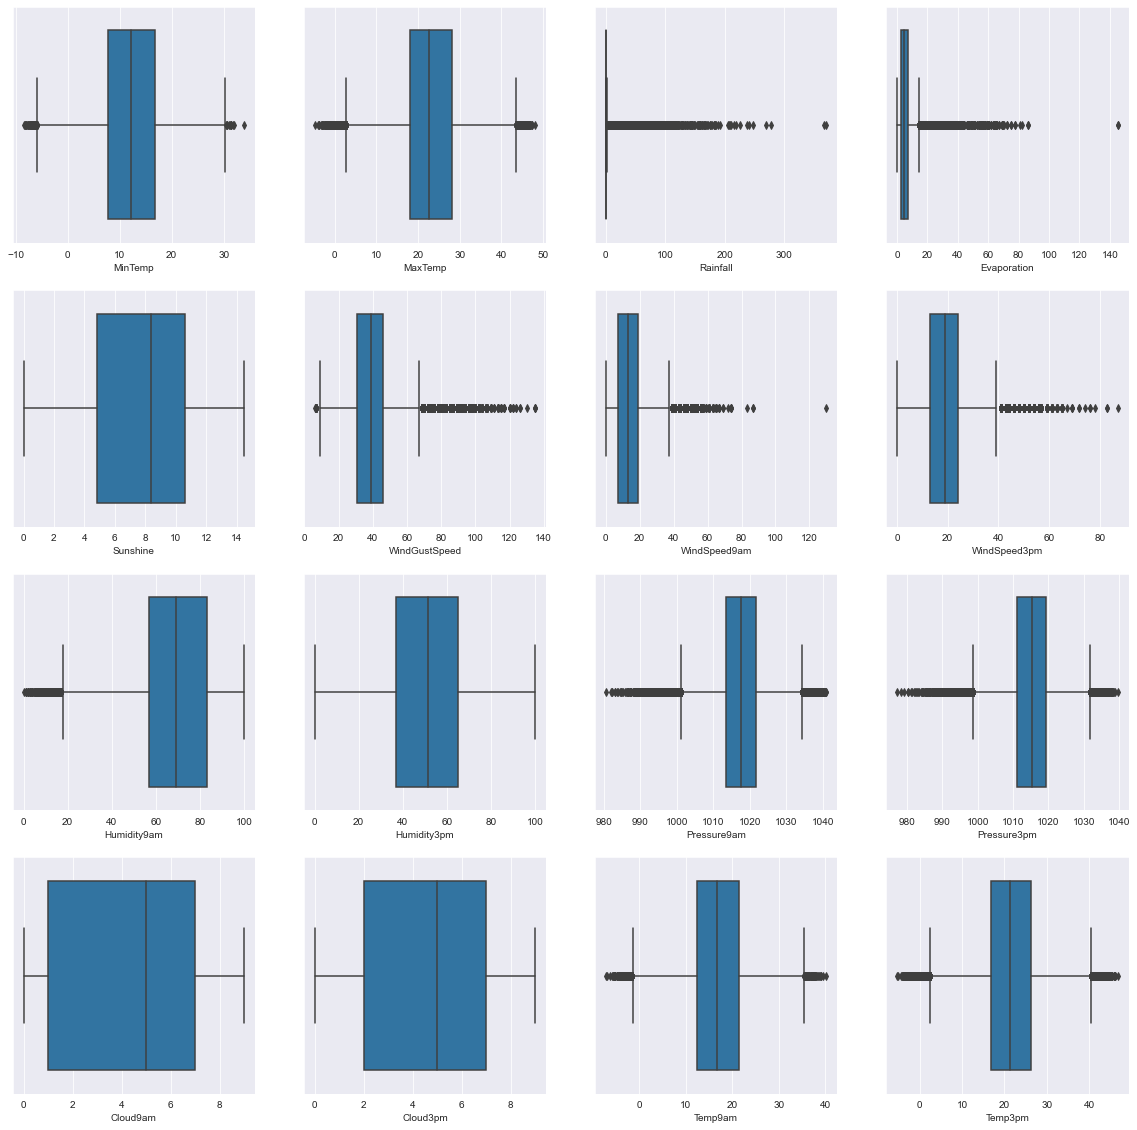

<Figure size 432x288 with 0 Axes>

In [210]:
i = 1
plt.figure(figsize=(20,20))
for col in df_num:
    plt.subplot(4,4,i)
    sns.boxplot(df[col])
    i = i+1
plt.show()
plt.tight_layout()

In [197]:
for col in df_num:
    df[col]  = df[col].clip(lower = df[col].quantile(0.025),upper=df[col].quantile(0.975))

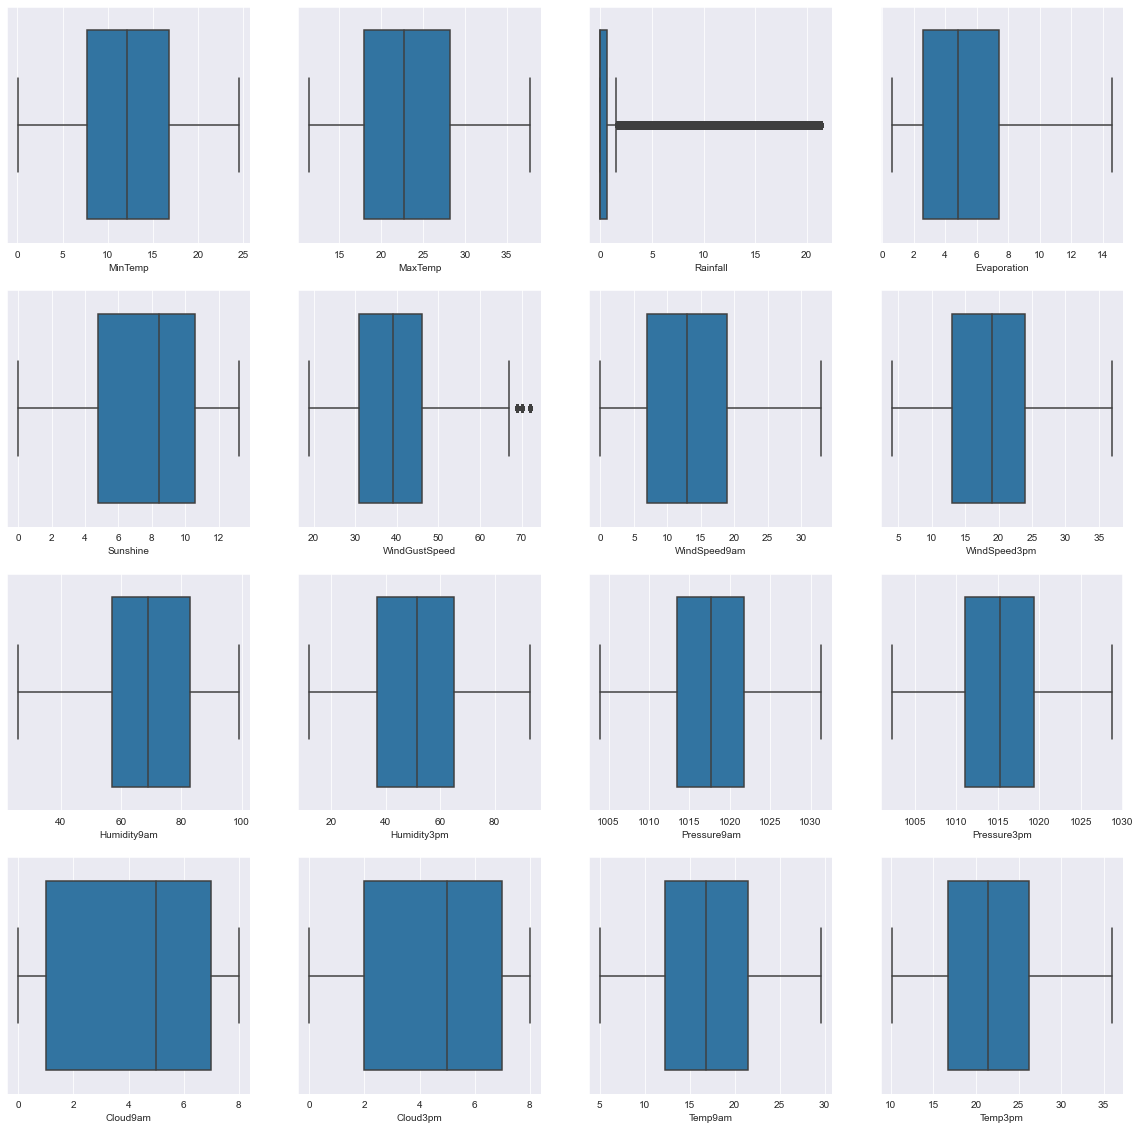

<Figure size 432x288 with 0 Axes>

In [79]:
i = 1
plt.figure(figsize=(20,20))
for col in df_num:
    plt.subplot(4,4,i)
    sns.boxplot(df[col])
    i = i+1
plt.show()
plt.tight_layout()

In [80]:
df[df_num].corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.731418,0.097911,0.306809,0.037053,0.176369,0.178620,0.178518,-0.227245,0.012325,-0.438287,-0.447281,0.048264,0.012953,0.897896,0.697383
MaxTemp,0.731418,1.000000,-0.138923,0.382855,0.240817,0.073988,0.021904,0.052939,-0.490983,-0.488728,-0.331538,-0.421885,-0.180344,-0.166734,0.880484,0.970175
Rainfall,0.097911,-0.138923,1.000000,-0.069945,-0.149946,0.149540,0.093476,0.066434,0.298122,0.322005,-0.187960,-0.127373,0.169500,0.139636,-0.027844,-0.143574
Evaporation,0.306809,0.382855,-0.069945,1.000000,0.182775,0.129826,0.118984,0.087427,-0.312893,-0.239477,-0.192172,-0.208974,-0.101089,-0.098101,0.361651,0.370142
Sunshine,0.037053,0.240817,-0.149946,0.182775,1.000000,-0.016803,0.006903,0.029203,-0.250075,-0.318733,0.022413,-0.012555,-0.301169,-0.308698,0.151863,0.254609
WindGustSpeed,0.176369,0.073988,0.149540,0.129826,-0.016803,1.000000,0.574955,0.656980,-0.210737,-0.028033,-0.418817,-0.375211,0.040761,0.065519,0.147947,0.040149
WindSpeed9am,0.178620,0.021904,0.093476,0.118984,0.006903,0.574955,1.000000,0.502369,-0.276693,-0.034732,-0.210121,-0.160854,0.010662,0.032120,0.132504,0.012165
WindSpeed3pm,0.178518,0.052939,0.066434,0.087427,0.029203,0.656980,0.502369,1.000000,-0.146511,0.019065,-0.272652,-0.232911,0.033861,0.018268,0.166878,0.031693
Humidity9am,-0.227245,-0.490983,0.298122,-0.312893,-0.250075,-0.210737,-0.276693,-0.146511,1.000000,0.655335,0.134138,0.179307,0.280163,0.210697,-0.459173,-0.483396
Humidity3pm,0.012325,-0.488728,0.322005,-0.239477,-0.318733,-0.028033,-0.034732,0.019065,0.655335,1.000000,-0.022524,0.053899,0.315938,0.314165,-0.204609,-0.545527


In [198]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

In [199]:
corr_features = correlation(df[df_num], 0.6)
len(set(corr_features))

6

In [200]:
corr_features

{'Humidity3pm', 'MaxTemp', 'Pressure3pm', 'Temp3pm', 'Temp9am', 'WindSpeed3pm'}

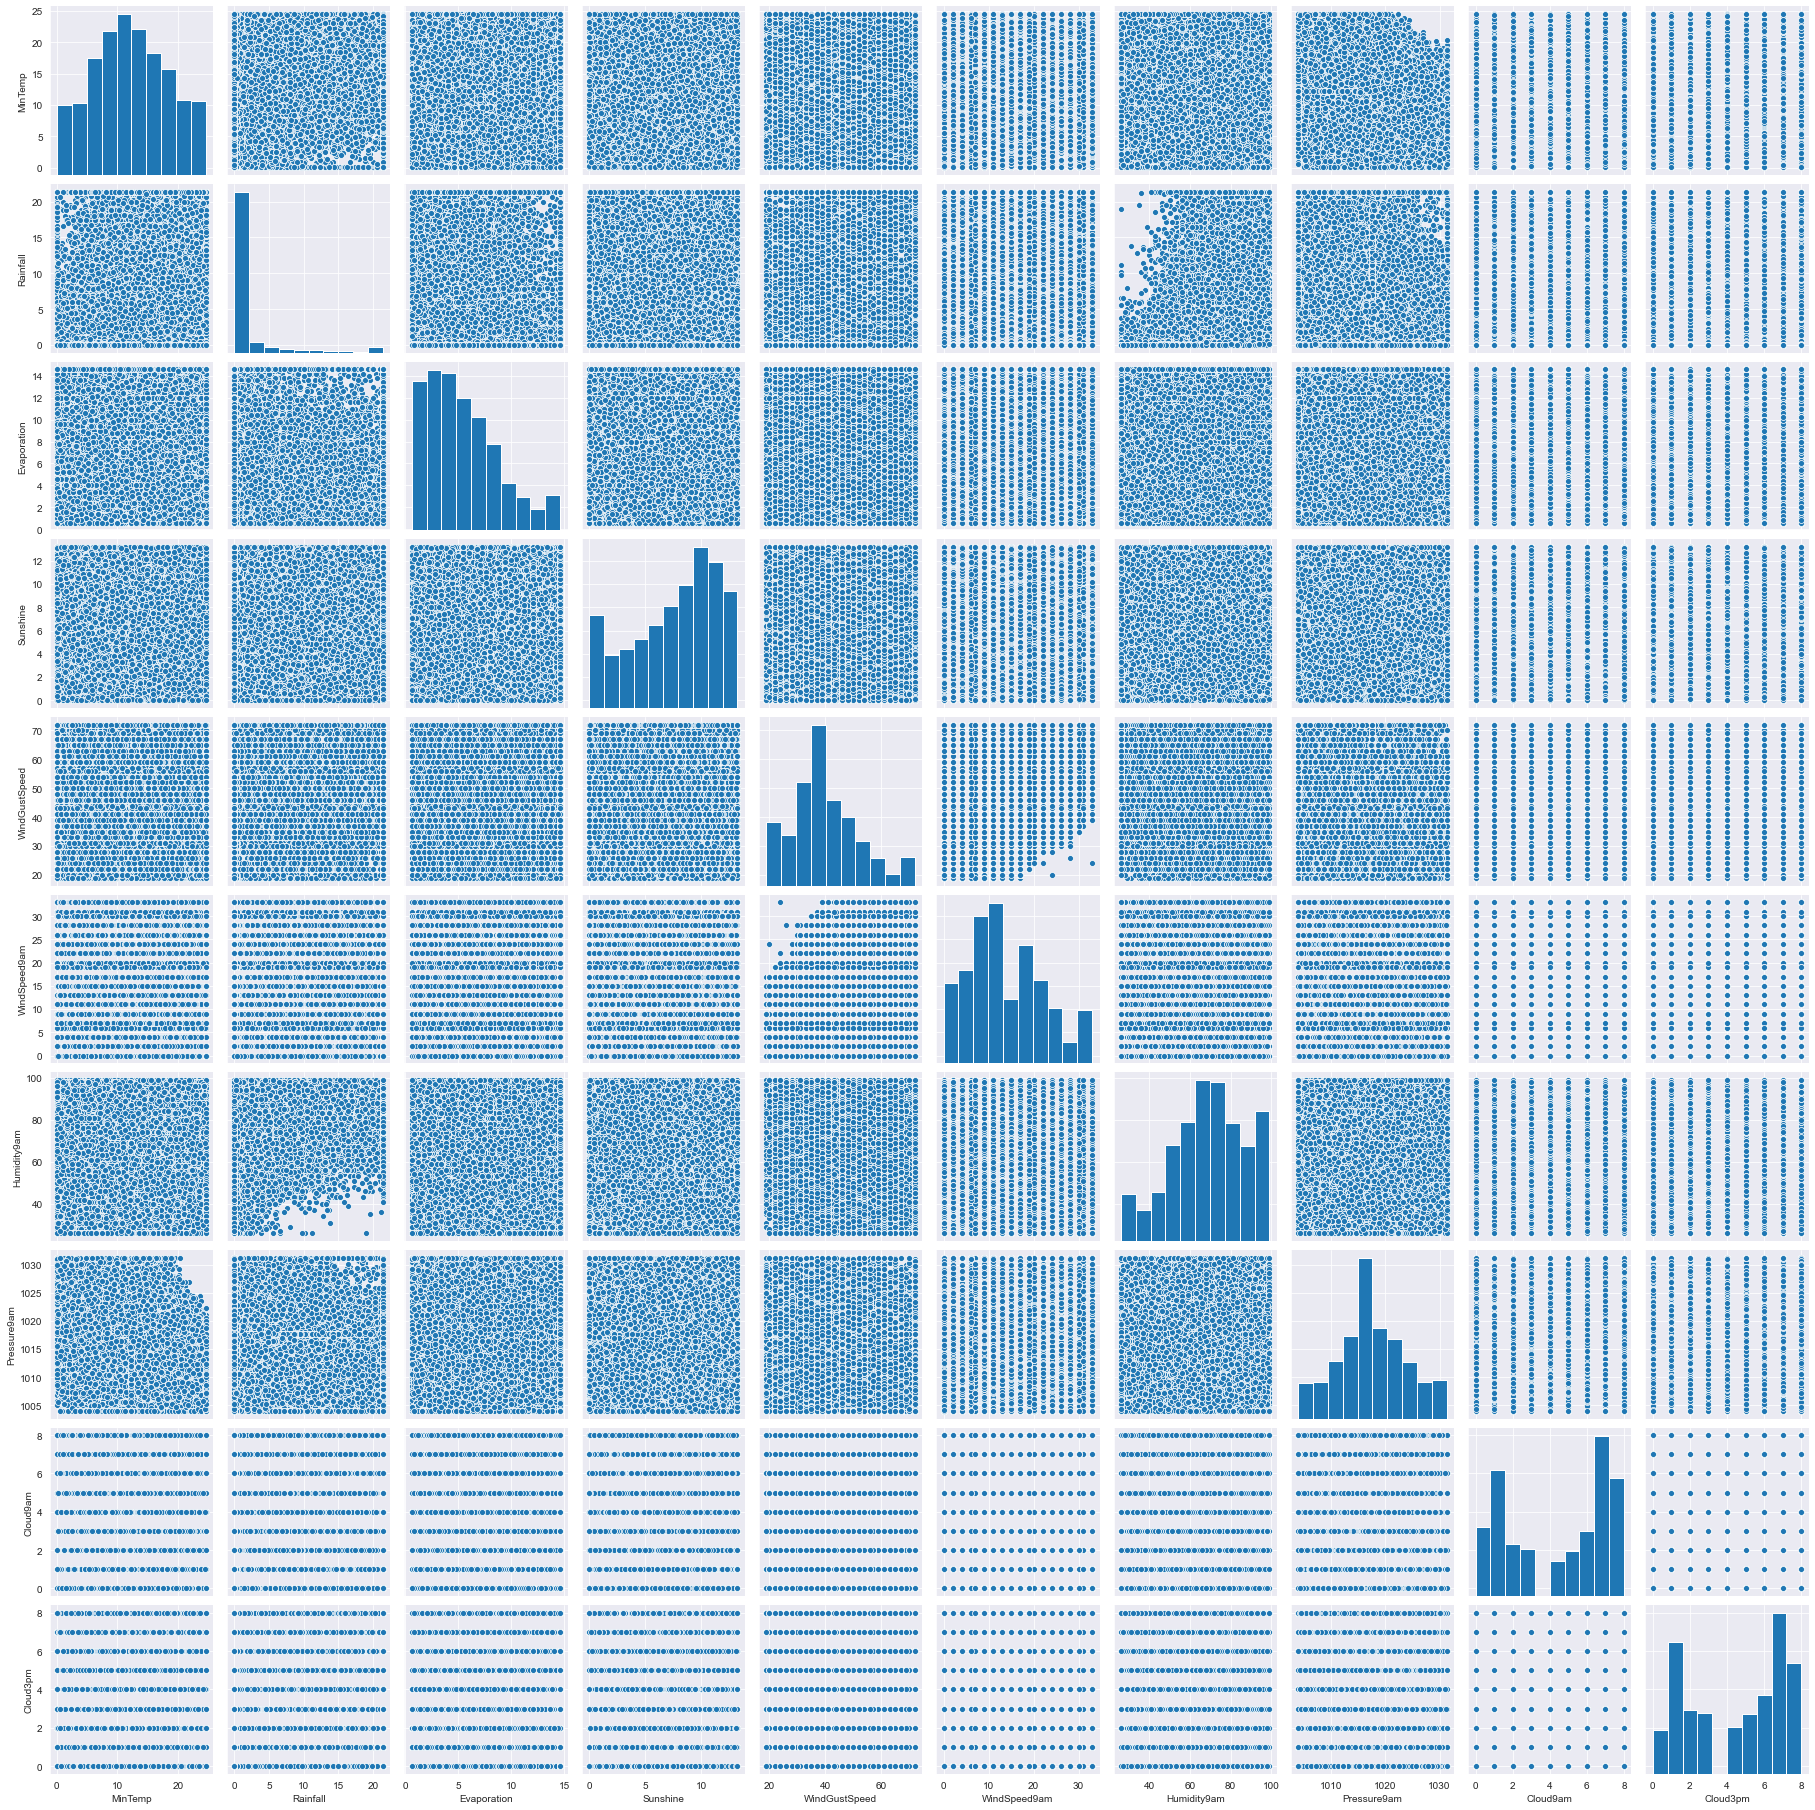

In [201]:
sns.pairplot(df[df_num].drop(corr_features, axis = 1))

In [202]:
df = df.drop(corr_features, axis = 1)

In [203]:
corr_features

{'Humidity3pm', 'MaxTemp', 'Pressure3pm', 'Temp3pm', 'Temp9am', 'WindSpeed3pm'}

In [204]:
for feat in corr_features:
    df_num.remove(feat)

In [205]:
for feat in corr_features:
    df_cont.remove(feat)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = df_num


vif['VIF'] = [variance_inflation_factor(df[df_num].values,i) for i in range(df[df_num].shape[1])]

vif

,Features,VIF
0,MinTemp,5.767835
1,Rainfall,1.390132
2,Evaporation,4.163147
3,Sunshine,6.112764
4,WindGustSpeed,17.660804
5,WindSpeed9am,5.891085
6,Humidity9am,22.990782
7,Pressure9am,56.934039
8,Cloud9am,4.207187
9,Cloud3pm,4.544851


## Feature selection with anova

In [173]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [206]:
X = df[df_num]
y = df['RainTomorrow']

In [207]:
fs = SelectKBest(score_func=f_classif, k=7)
fs.fit_transform(X, y)
fs.scores_

array([  977.83808452, 14234.31903056,   796.75304373,  8301.96174384,
        7342.37557851,  1015.03812541, 10039.33192243,  7872.12482399,
        5898.34022981,  8073.68792694])

In [208]:
fs.pvalues_

array([6.07436781e-214, 0.00000000e+000, 8.15294512e-175, 0.00000000e+000,
       0.00000000e+000, 5.65637634e-222, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000])

In [209]:
cols = pd.DataFrame()
cols['Feature'] = df_num
cols['Fstat'] = fs.scores_
cols['Pvalues'] = fs.pvalues_
cols = cols.sort_values(by = 'Fstat', axis = 0, ascending = False)
cols

,Feature,Fstat,Pvalues
1,Rainfall,14234.319031,0.000000e+00
6,Humidity9am,10039.331922,0.000000e+00
3,Sunshine,8301.961744,0.000000e+00
9,Cloud3pm,8073.687927,0.000000e+00
7,Pressure9am,7872.124824,0.000000e+00
4,WindGustSpeed,7342.375579,0.000000e+00
8,Cloud9am,5898.340230,0.000000e+00
5,WindSpeed9am,1015.038125,5.656376e-222
0,MinTemp,977.838085,6.074368e-214
2,Evaporation,796.753044,8.152945e-175


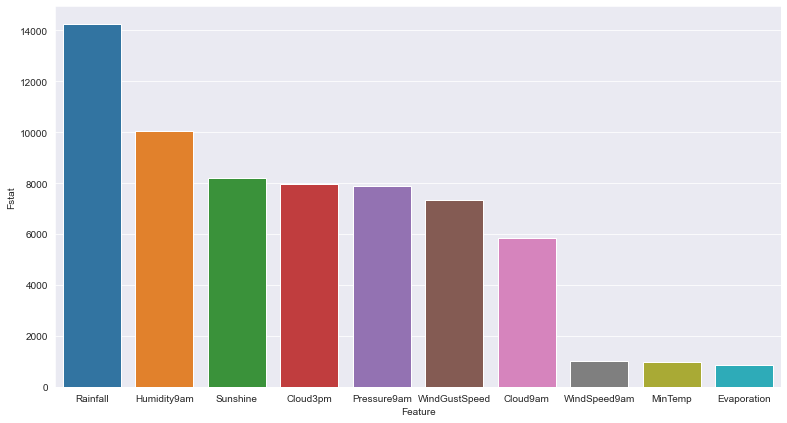

In [178]:
plt.figure(figsize=(13,7))
sns.barplot(cols['Feature'],cols['Fstat'])
plt.show()

In [210]:
fs.get_support(indices = True)

array([1, 3, 4, 6, 7, 8, 9], dtype=int64)

In [211]:
X.iloc[:,fs.get_support(indices = True)].columns

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Pressure9am',
       'Cloud9am', 'Cloud3pm'],
      dtype='object')

In [212]:
for col in df_num:
    if col not in X.iloc[:,fs.get_support(indices = True)].columns:
        df = df.drop(col,axis=1)

In [213]:
df.drop('Date', axis = 1, inplace = True)
df_cat.remove('Date')

In [214]:
for feat in ['Location','WindGustDir','WindDir9am','WindDir3pm']:
    df1 = df.groupby(feat)['RainTomorrow'].value_counts().unstack().iloc[:,1].sort_values(ascending= False)
    mydict = { j:i for i,j in (enumerate(df1.index,1))}
    df[feat] = df[feat].replace(mydict)


In [215]:
mydict = {'Yes':1, 'No':0}
df['RainToday'] = df['RainToday'].replace(mydict)
df['RainTomorrow'] = df['RainTomorrow'].replace(mydict)


In [216]:
df.head()

,Location,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,30,0.6,2.9,1,44.0,4,4,71.0,1007.7,8.0,1.0,0,0
1,30,0.0,12.4,4,44.0,2,7,44.0,1010.6,7.0,5.0,0,0
2,30,0.0,6.5,5,46.0,4,7,38.0,1007.6,8.0,2.0,0,0
3,30,0.0,4.0,14,24.0,13,14,45.0,1017.6,0.0,7.0,0,0
4,30,1.0,10.1,1,41.0,14,5,82.0,1010.8,7.0,8.0,0,0


In [217]:
df[df_cat]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,30,1,4,4,0,0
1,30,4,2,7,0,0
2,30,5,4,7,0,0
3,30,14,13,14,0,0
4,30,1,14,5,0,0
...,...,...,...,...,...,...
145455,49,13,13,16,0,0
145456,49,8,13,3,0,0
145457,49,2,13,4,0,0
145458,49,11,11,3,0,0


In [218]:
X = df[df_cat].drop('RainTomorrow',1)
y = df['RainTomorrow']

In [219]:
fs = SelectKBest(score_func=chi2, k=3)
fs.fit_transform(X, y)
fs.scores_

array([25247.05782954,  3151.70900694,  4401.44860184,  1515.52817148,
       10617.40077203])

In [220]:
fs.pvalues_

array([0., 0., 0., 0., 0.])

In [221]:
cols = pd.DataFrame()
cols['Feature'] = df[df_cat].drop('RainTomorrow',1).columns
cols['Fstat'] = fs.scores_
cols['Pvalues'] = fs.pvalues_
cols = cols.sort_values(by = 'Fstat', axis = 0, ascending = False)
cols

,Feature,Fstat,Pvalues
0,Location,25247.057830,0.0
4,RainToday,10617.400772,0.0
2,WindDir9am,4401.448602,0.0
1,WindGustDir,3151.709007,0.0
3,WindDir3pm,1515.528171,0.0


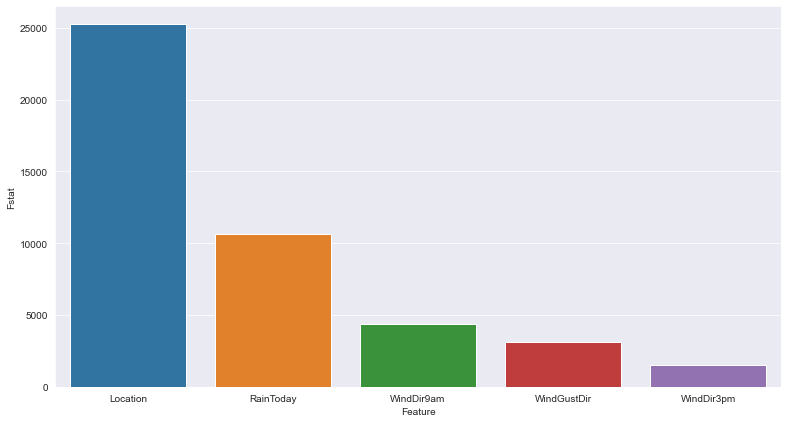

In [47]:
plt.figure(figsize=(13,7))
sns.barplot(cols['Feature'],cols['Fstat'])
plt.show()

In [222]:
X.iloc[:,fs.get_support(indices = True)].columns

Index(['Location', 'WindDir9am', 'RainToday'], dtype='object')

In [223]:
df_cat.remove('RainTomorrow')


In [224]:
for col in df_cat:
    if col not in X.iloc[:,fs.get_support(indices = True)].columns:
        df = df.drop(col,axis=1)
   

In [80]:
# for col in ['Rainfall','Sunshine','WindGustSpeed','Humidity9am','Pressure9am','Cloud9am','Cloud3pm']:
#     df[col] = stats.zscore(df[col])

In [225]:
df.head()

,Location,Rainfall,Sunshine,WindGustSpeed,WindDir9am,Humidity9am,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,30,0.6,2.9,44.0,4,71.0,1007.7,8.0,1.0,0,0
1,30,0.0,12.4,44.0,2,44.0,1010.6,7.0,5.0,0,0
2,30,0.0,6.5,46.0,4,38.0,1007.6,8.0,2.0,0,0
3,30,0.0,4.0,24.0,13,45.0,1017.6,0.0,7.0,0,0
4,30,1.0,10.1,41.0,14,82.0,1010.8,7.0,8.0,0,0


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [83]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, plot_roc_curve

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X = df.drop('RainTomorrow', 1)
y = df['RainTomorrow']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =0)


In [104]:
# pip install -U imbalanced-learn

In [87]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [88]:
sm = SMOTETomek(random_state=0)
x_sam, y_sam = sm.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_sam)))

The number of classes before fit Counter({0: 79485, 1: 22337})
The number of classes after fit Counter({0: 78784, 1: 78784})


In [89]:
models = [LogisticRegression(random_state=0),DecisionTreeClassifier(random_state=0), RandomForestClassifier(random_state=0),AdaBoostClassifier(random_state=0),GradientBoostingClassifier(random_state=0),XGBClassifier(random_state=0),GaussianNB()]

In [90]:
def base_models(model,X_sam, X_test, y_sam, y_test):
    ml_model = model.fit(X_sam,y_sam)
    
    y_pred = ml_model.predict(X_test)
    
    print(f' MODEL : {model}')
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('\n\n')

In [91]:
for model in models:
    base_models(model,x_sam, X_test, y_sam, y_test)

C:\Users\win10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 MODEL : LogisticRegression(random_state=0)
[[25066  9032]
 [ 2787  6753]]
0.7291580732389202
              precision    recall  f1-score   support

           0       0.90      0.74      0.81     34098
           1       0.43      0.71      0.53      9540

    accuracy                           0.73     43638
   macro avg       0.66      0.72      0.67     43638
weighted avg       0.80      0.73      0.75     43638




 MODEL : DecisionTreeClassifier(random_state=0)
[[27871  6227]
 [ 5069  4471]]
0.7411430404693158
              precision    recall  f1-score   support

           0       0.85      0.82      0.83     34098
           1       0.42      0.47      0.44      9540

    accuracy                           0.74     43638
   macro avg       0.63      0.64      0.64     43638
weighted avg       0.75      0.74      0.75     43638




 MODEL : RandomForestClassifier(random_state=0)
[[31073  3025]
 [ 4949  4591]]
0.817269352399285
              precision    recall  f1-score   suppo

C:\Users\win10\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:59:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 MODEL : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
[[31845  2253]
 [ 5213  4327]]
0.8289105825198222
              precision    recall  f1-score   sup

In [55]:
from sklearn.model_selection import GridSearchCV
grid = {'max_depth' : [8,9,10,11],   # It represents the depth of each tree, which is the maximum number of different features used in each tree
'learning_rate':np.linspace(0.1,0.01,5),  # impact of each tree on the final prediction. lesser the better (0.1 to 0.01)
'subsample':[0.8,0.9,1], # number of rows taken as sample for each tree. take from 0.8 to 1
'colsample_bytree':[0.3,0.5,0.7, 0.8], # number of columns taken for each tree.Values from 0.3 to 0.8 if you have many columns (especially if you did one-hot encoding), or 0.8 to 1 if you only have a few columns.
'gamme':[0,1,5]}

In [56]:
xg_model = XGBClassifier(random_state=0)
grid_cv = GridSearchCV(estimator=xg_model, param_grid=grid,cv = 3, n_jobs=-1,scoring='accuracy')
grid_cv.fit(X_train,y_train)

C:\Users\win10\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:41:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamme } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:41:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, valid

In [57]:
grid_cv.best_params_

{'colsample_bytree': 0.8,
 'gamme': 0,
 'learning_rate': 0.1,
 'max_depth': 8,
 'subsample': 1}

In [60]:
final_model= XGBClassifier(random_state=0,colsample_bytree = 0.8,gamma= 0, learning_rate= 0.1,max_depth= 8,subsample =1)
final_model = final_model.fit(x_sam,y_sam)
    
y_pred = final_model.predict(X_test)
    
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print('\n\n')

C:\Users\win10\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[31681  2417]
 [ 5137  4403]]
0.8268939914753197
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     34098
           1       0.65      0.46      0.54      9540

    accuracy                           0.83     43638
   macro avg       0.75      0.70      0.72     43638
weighted avg       0.81      0.83      0.82     43638

0.6953232377560645





In [61]:
rf_model = RandomForestClassifier(random_state=0).fit(x_sam,y_sam)
y_pred = rf_model.predict(X_test)
    
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print('\n\n')

[[30944  3154]
 [ 4754  4786]]
0.8187817956826619
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     34098
           1       0.60      0.50      0.55      9540

    accuracy                           0.82     43638
   macro avg       0.73      0.70      0.72     43638
weighted avg       0.81      0.82      0.81     43638

0.7045895275585613





In [65]:
from sklearn.model_selection import GridSearchCV

grid = {'max_depth' : [10,15,20,25,30],
'min_samples_leaf' : [10,20,30,40,50],
'max_samples' : [0.2,0.4,0.6,0.8],
'max_features' : ['auto', 'sqrt', 'log2'],
'criterion' : ["gini", "entropy"] }



In [66]:
rf_model = RandomForestClassifier()
grid_cv = GridSearchCV(estimator=rf_model, param_grid=grid,cv = 3, n_jobs=-1,scoring='accuracy')
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [69]:
grid_cv.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'max_samples': 0.8,
 'min_samples_leaf': 10}

In [92]:
rf_model = RandomForestClassifier(random_state = 0,criterion = 'gini', max_depth= 30, max_features = 'log2', max_samples = 0.8, min_samples_leaf = 10)
rf_model.fit(x_sam,y_sam)
y_pred = rf_model.predict(X_test)
    
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print('\n\n')

[[30138  3960]
 [ 4314  5226]]
0.8103946102021174
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     34098
           1       0.57      0.55      0.56      9540

    accuracy                           0.81     43638
   macro avg       0.72      0.72      0.72     43638
weighted avg       0.81      0.81      0.81     43638

0.7158314491969319





In [93]:
pickle.dump(rf_model,open('randomforest.pkl','wb'))

In [94]:
model = pickle.load(open('randomforest.pkl','rb'))

In [111]:
y_pred1 = rf_model.predict(X_test)
    
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print(roc_auc_score(y_test,y_pred1))
print('\n\n')

[[29926  4172]
 [ 4178  5362]]
0.8086530088455016
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     34098
           1       0.56      0.56      0.56      9540

    accuracy                           0.81     43638
   macro avg       0.72      0.72      0.72     43638
weighted avg       0.81      0.81      0.81     43638

0.7198506450700182



